### import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.feature_selection import SelectKBest,chi2
import random
import joblib

### import dataset

In [2]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### independent variables are:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (7752, 25)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### using func info we can conclude that there multiple columns with null values
#### Apart from lat, lon, DEM,Slope,Solar radiation columns all other columns have null values in it.
### only date column is of type object rest all is of type float

### missing data in date

In [7]:
df[df.Date.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [8]:
df.Date.value_counts()

18-08-2016    25
15-08-2014    25
20-07-2017    25
26-07-2016    25
22-08-2015    25
              ..
18-08-2014    25
15-07-2014    25
04-07-2013    25
31-07-2016    25
11-08-2014    25
Name: Date, Length: 310, dtype: int64

### Every date is grouped with a count of 25. better option is to drop 2 rows with nan date & station

In [9]:
df=df[df.Date.notnull()]

### conv whole date into month only datapoint as month wise there is always change in temp.
### month data is always highly correlated than year and the exact date

In [10]:
for i in range(len(df['Date'])):
    df['Date'][i]=int(df['Date'][i].split('-')[1])
df = df.astype({'Date': np.int64})

In [11]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,6,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,6,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,6,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,6,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,6,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,8,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,8,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,8,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,8,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


### missing data of target variable
### target variable also has null values, for now drop those rows we will fill those rows once model is built and by using predict method

In [12]:
df_new=df[df.Next_Tmax.notnull()][df.Next_Tmin.notnull()]

In [13]:
df_new[df_new.Next_Tmax.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [14]:
df_new[df_new.Next_Tmin.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [15]:
print('Number of rows x columns in dataset are:',df_new.shape)

Number of rows x columns in dataset are: (7723, 25)


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   int64  
 2   Present_Tmax      7663 non-null   float64
 3   Present_Tmin      7663 non-null   float64
 4   LDAPS_RHmin       7648 non-null   float64
 5   LDAPS_RHmax       7648 non-null   float64
 6   LDAPS_Tmax_lapse  7648 non-null   float64
 7   LDAPS_Tmin_lapse  7648 non-null   float64
 8   LDAPS_WS          7648 non-null   float64
 9   LDAPS_LH          7648 non-null   float64
 10  LDAPS_CC1         7648 non-null   float64
 11  LDAPS_CC2         7648 non-null   float64
 12  LDAPS_CC3         7648 non-null   float64
 13  LDAPS_CC4         7648 non-null   float64
 14  LDAPS_PPT1        7648 non-null   float64
 15  LDAPS_PPT2        7648 non-null   float64
 16  LDAPS_PPT3        7648 non-null   float64


### plot dist plot of all columns 

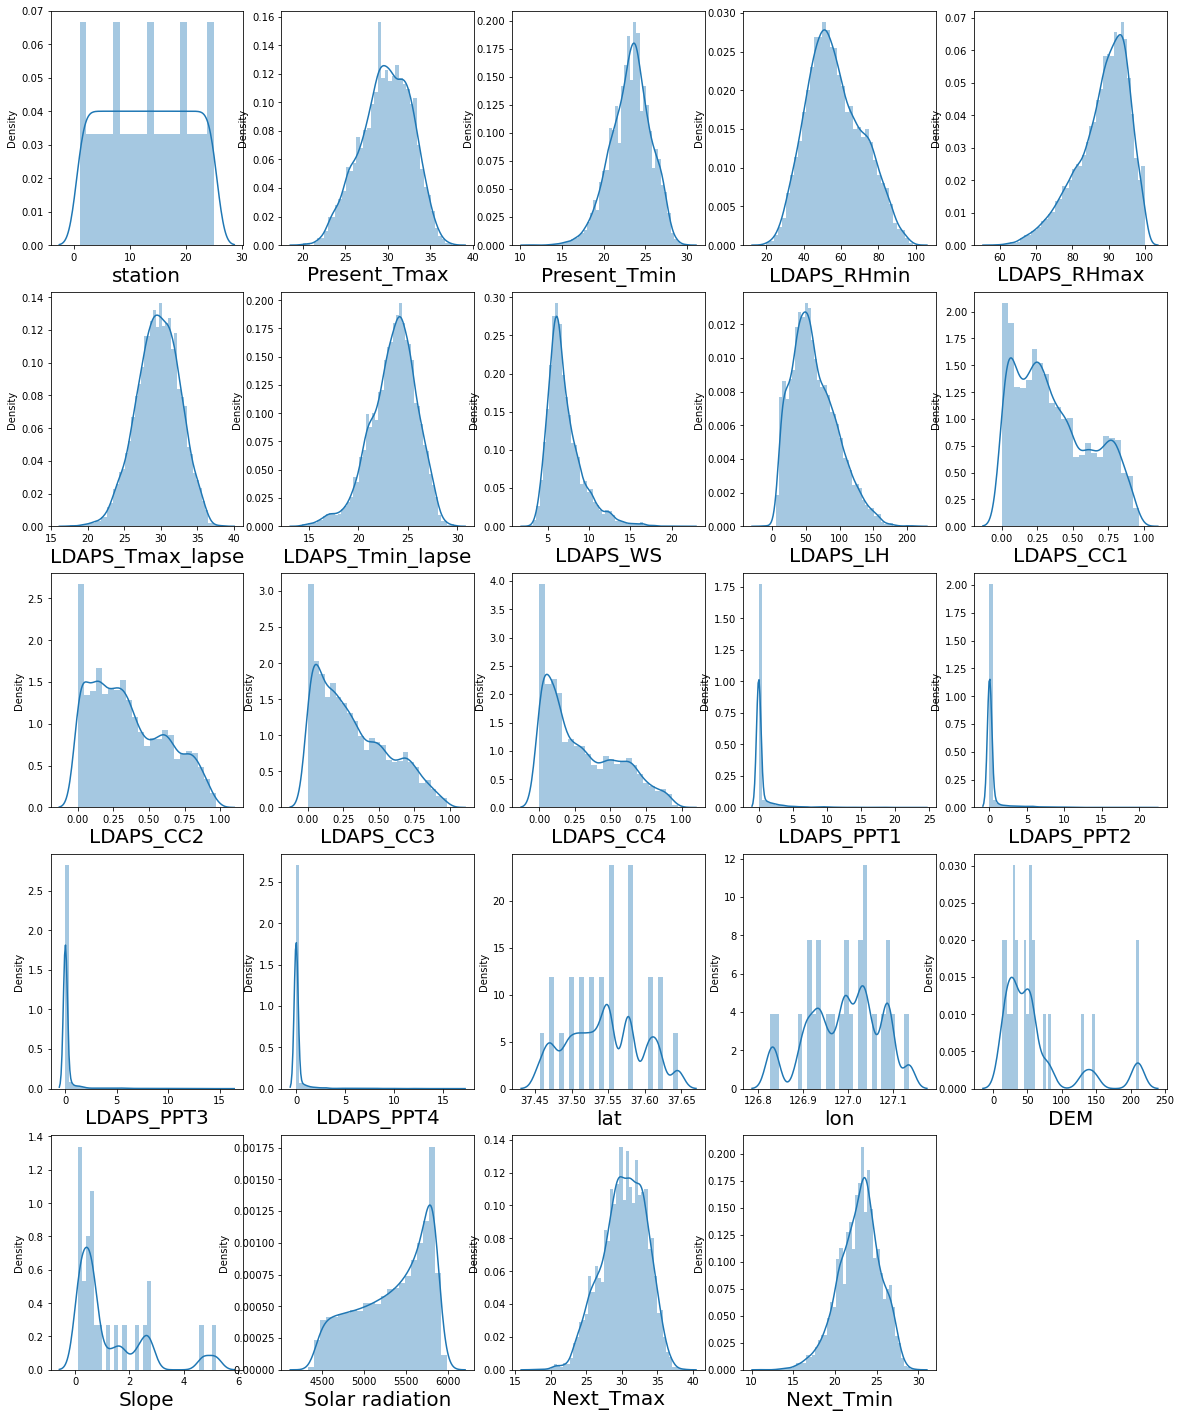

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if column!='Date':
        if plotnumber<=len(df.columns):
            ax=plt.subplot(5,5,plotnumber)
            sn.distplot(df[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()

### columns with bimodial distribution: Slope, Dem, Ion, Iat
### columns with rectangular dist plot: station
### rest all are normal distribution with some biasing present
### columns having normal distribution: fill their null values using mean

In [18]:
for i in df_new.columns:
    if len(df_new[df_new[i].isnull()])>0:
        print(i)
        print(len(df_new[df_new[i].isnull()]))
        print(round(df_new[i].mean(),2))
        df_new[[i]]=df_new[[i]].fillna(round(df_new[i].mean(),2))
        print(len(df_new[df_new[i].isnull()]))
        print('-----------------'*5)

Present_Tmax
60
29.77
0
-------------------------------------------------------------------------------------
Present_Tmin
60
23.23
0
-------------------------------------------------------------------------------------
LDAPS_RHmin
75
56.74
0
-------------------------------------------------------------------------------------
LDAPS_RHmax
75
88.37
0
-------------------------------------------------------------------------------------
LDAPS_Tmax_lapse
75
29.62
0
-------------------------------------------------------------------------------------
LDAPS_Tmin_lapse
75
23.51
0
-------------------------------------------------------------------------------------
LDAPS_WS
75
7.1
0
-------------------------------------------------------------------------------------
LDAPS_LH
75
62.46
0
-------------------------------------------------------------------------------------
LDAPS_CC1
75
0.37
0
-------------------------------------------------------------------------------------
LDAPS_CC2
75
0.36


In [19]:
df_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,6,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,6,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,6,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,6,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,6,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,8,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,8,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,8,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,8,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   int64  
 2   Present_Tmax      7723 non-null   float64
 3   Present_Tmin      7723 non-null   float64
 4   LDAPS_RHmin       7723 non-null   float64
 5   LDAPS_RHmax       7723 non-null   float64
 6   LDAPS_Tmax_lapse  7723 non-null   float64
 7   LDAPS_Tmin_lapse  7723 non-null   float64
 8   LDAPS_WS          7723 non-null   float64
 9   LDAPS_LH          7723 non-null   float64
 10  LDAPS_CC1         7723 non-null   float64
 11  LDAPS_CC2         7723 non-null   float64
 12  LDAPS_CC3         7723 non-null   float64
 13  LDAPS_CC4         7723 non-null   float64
 14  LDAPS_PPT1        7723 non-null   float64
 15  LDAPS_PPT2        7723 non-null   float64
 16  LDAPS_PPT3        7723 non-null   float64


### from above we can confirm that there are no null values remaining

### now use describe func and analyze dataset

In [21]:
df_new.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,...,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000,7723.000000
mean,13.008157,7.466917,29.769817,23.225353,56.740762,88.371453,29.616687,23.512195,7.095405,62.458821,...,0.481582,0.275170,0.267359,37.544753,126.991373,61.913798,1.258368,5342.112868,30.275437,22.932837
std,7.214034,0.530389,2.956157,2.400841,14.571702,7.155898,2.927713,2.330885,2.165080,33.505514,...,1.736231,1.138910,1.185557,0.050370,0.079318,54.308844,1.370719,429.072274,3.123441,2.483181
min,1.000000,6.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,7.000000,27.800000,21.700000,46.045780,84.291611,27.696327,22.114527,5.686500,37.460390,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,7.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000
75%,19.000000,8.000000,32.000000,24.900000,66.991833,93.702629,31.684914,25.134434,7.996720,83.884903,...,0.024025,0.009648,0.000696,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,8.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


### from this we get many insights such as mean, min, max, std of each column. it also indiactes no null values.
### check correlation of columns

In [22]:
df_new.corr()[['Next_Tmax','Next_Tmin']]

,Next_Tmax,Next_Tmin
station,0.108306,0.128719
Date,0.102792,0.033754
Present_Tmax,0.609838,0.622235
Present_Tmin,0.470229,0.796415
LDAPS_RHmin,-0.442575,0.092968
LDAPS_RHmax,-0.287557,-0.075366
LDAPS_Tmax_lapse,0.828281,0.586581
LDAPS_Tmin_lapse,0.586735,0.881333
LDAPS_WS,-0.348681,-0.100922
LDAPS_LH,0.155615,-0.058755


### use heatmap to check correlation on dataset

<AxesSubplot:>

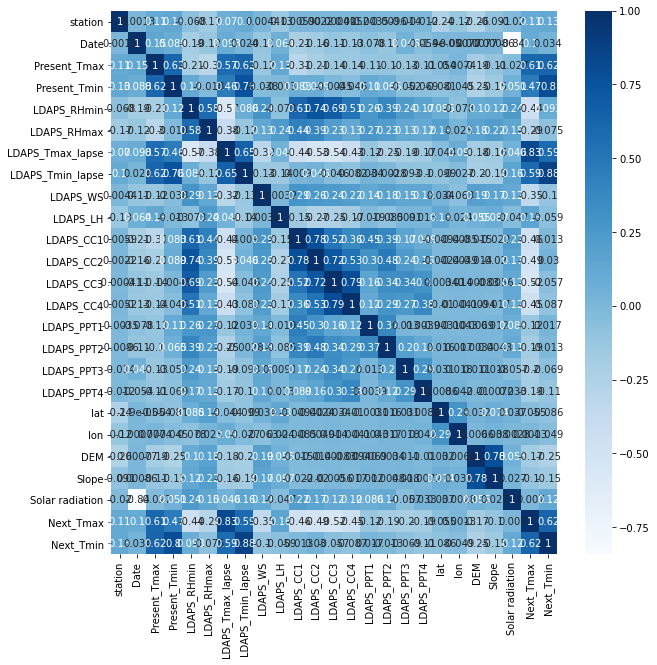

In [23]:
plt.figure(figsize=[10,10])
sn.heatmap(df_new.corr(),annot=True,cmap='Blues')

### from we can conclude that columns: Date,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,Ion,Dem,Slope,Solar radiation have very low correlation with target variable hence drop them

In [24]:
df_new=df_new.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)

In [25]:
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,0.233947,0.203896,1.616969e-01,0.130928,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,0.225508,0.251771,1.594441e-01,0.127727,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,0.209344,0.257469,2.040915e-01,0.142125,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,0.216372,0.226002,1.611574e-01,0.134249,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,0.151407,0.249995,1.788925e-01,0.170021,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,0.052902,0.030169,0.000000e+00,0.004380,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,0.066461,0.024518,5.850000e-07,0.017678,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,0.030034,0.081035,0.000000e+00,0.000000,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,0.035874,0.074962,0.000000e+00,0.000000,28.6,18.8


### check the graphical relation between Next_Tmax column and rest

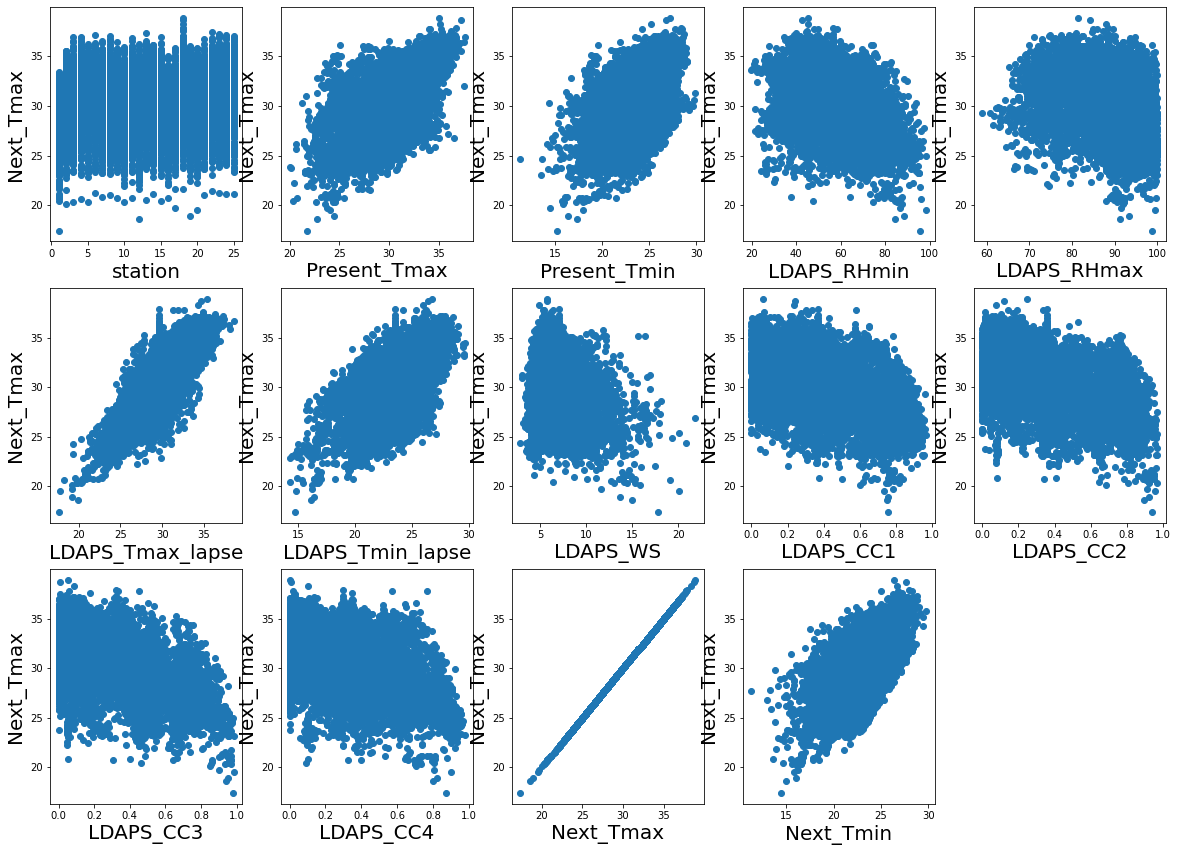

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df_new.columns:
    if plotnumber<=len(df_new.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df_new[i],df_new['Next_Tmax'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmax',fontsize=20)
    plotnumber+=1
plt.show()

### check the graphical relation between Next_Tmin column and rest

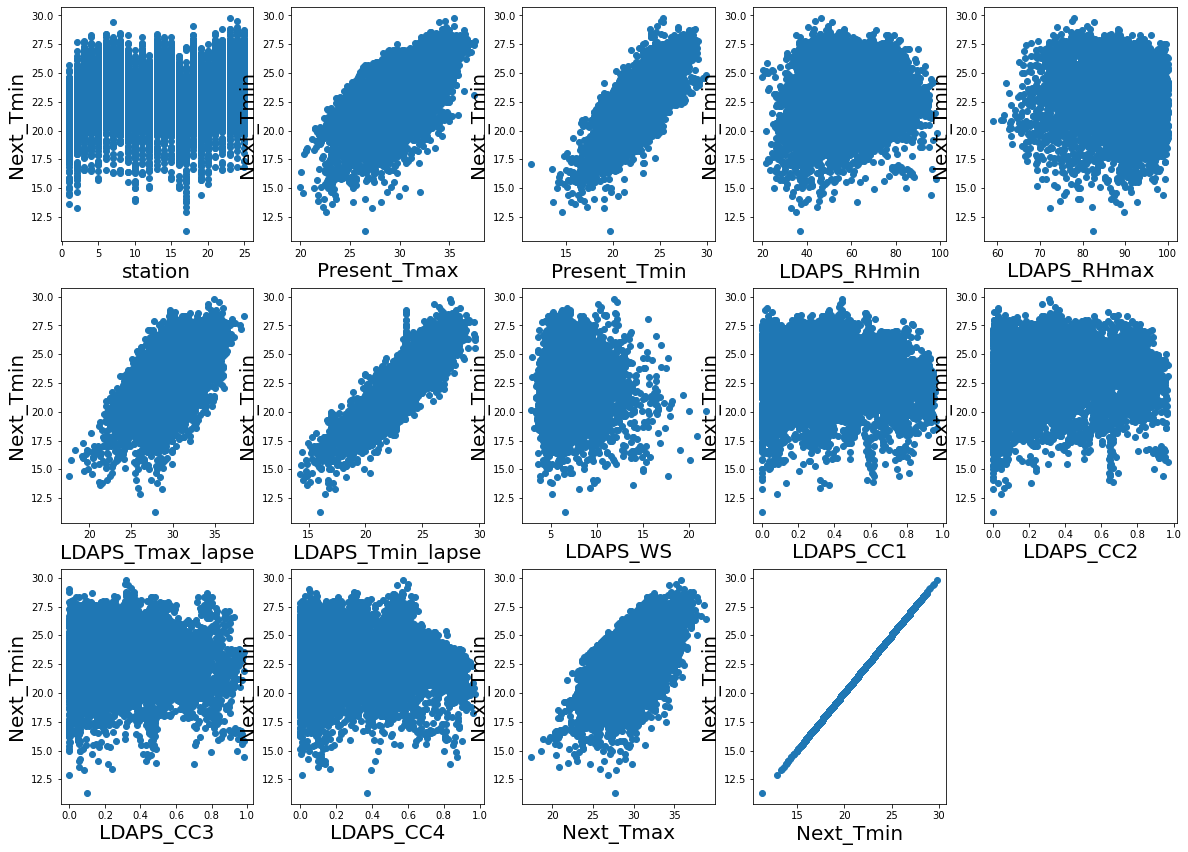

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df_new.columns:
    if plotnumber<=len(df_new.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df_new[i],df_new['Next_Tmin'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Next_Tmin',fontsize=20)
    plotnumber+=1
plt.show()

# for both target variable
### positively correlated data columns are: present tmax, present tmin, ldaps_tmin_lapse,ldaps_max_lapse
### station is categorical column
### rest all are scattered datapoints with slight negative correlation

### lets check outliers

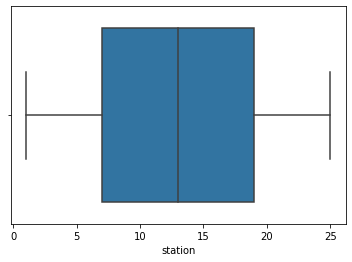

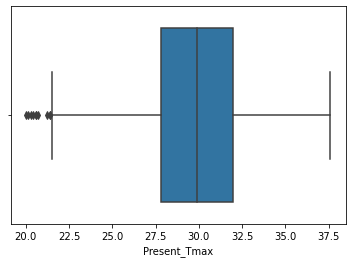

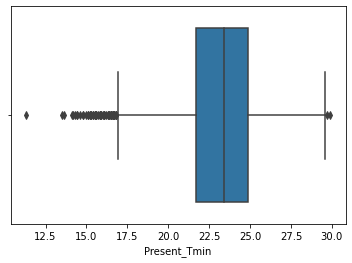

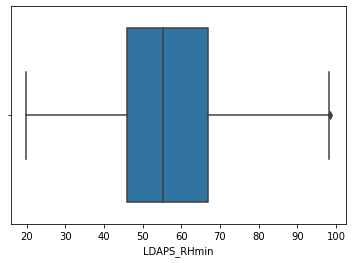

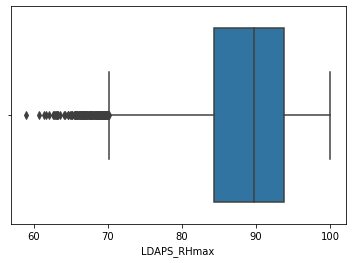

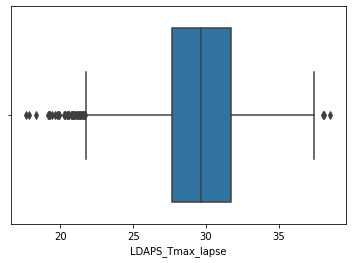

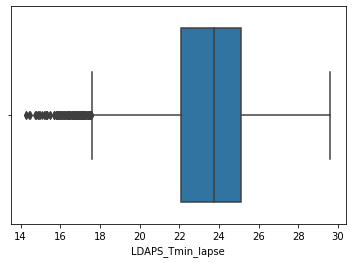

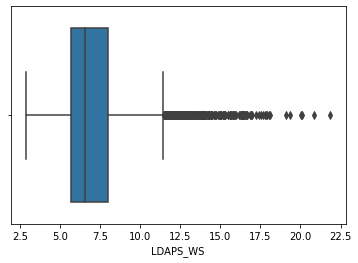

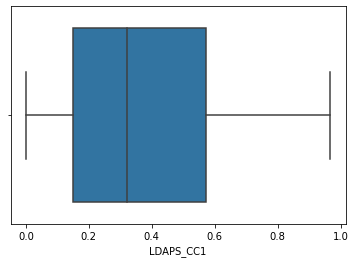

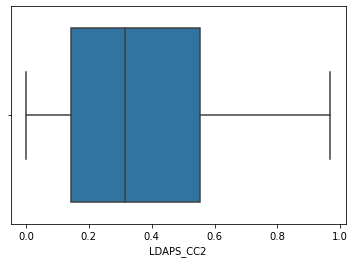

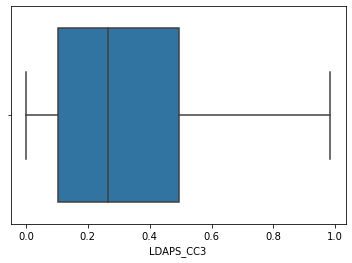

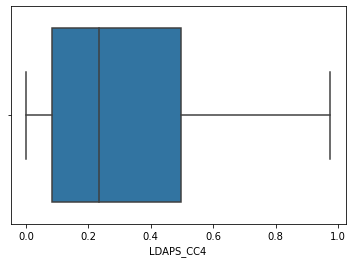

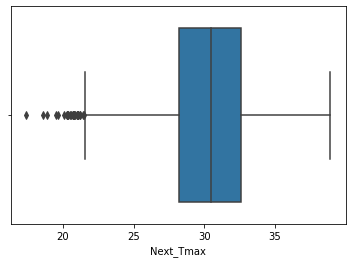

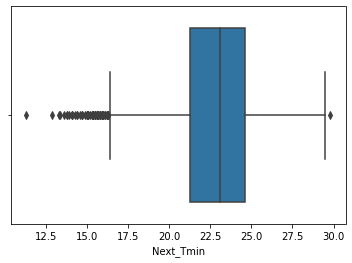

In [28]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

### outliers are present in non categorical column
### try to remove them

In [29]:
z_scr=zscore(df_new)
print(df_new.shape)
df_neww=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df_neww.shape)

(7723, 14)
(7467, 14)


### 3% data loss as per now

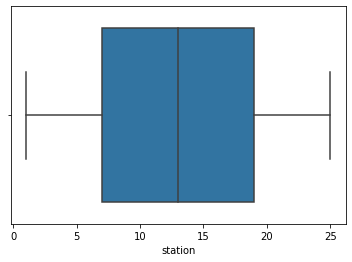

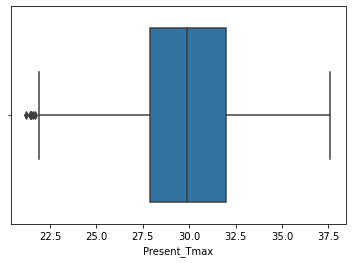

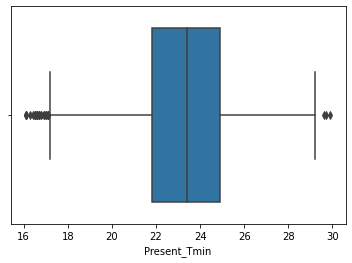

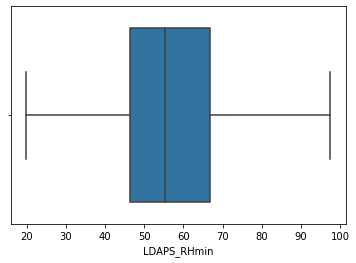

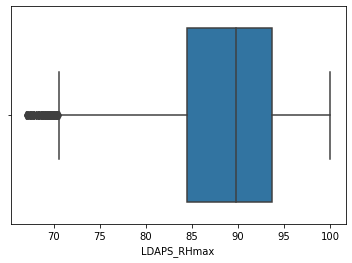

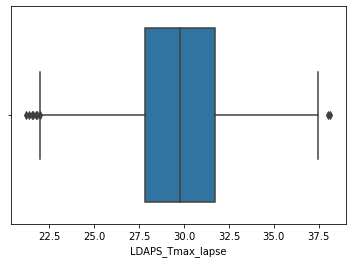

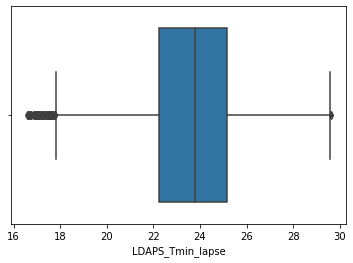

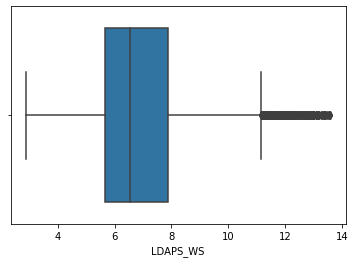

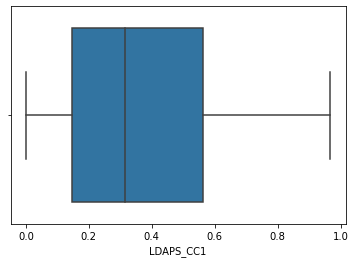

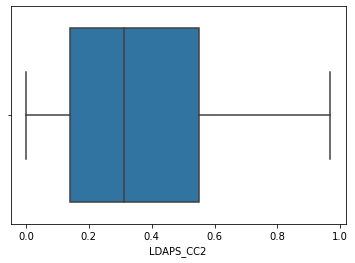

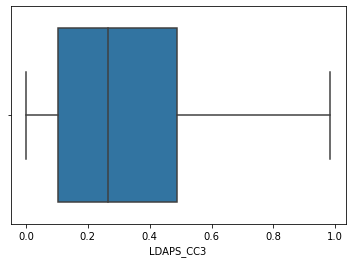

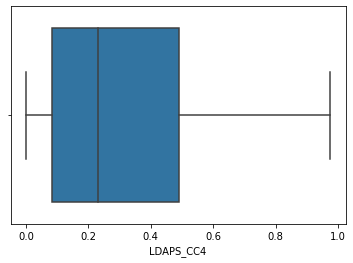

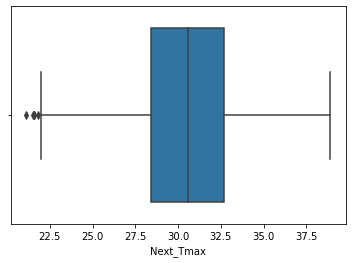

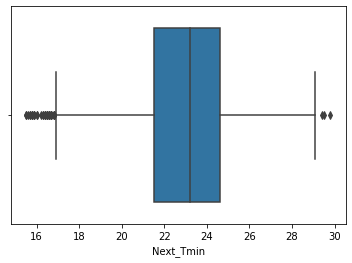

In [30]:
for i in df_neww.columns:
    sn.boxplot(df_neww[i])
    plt.show()

In [31]:
Q1 = df_neww.quantile(q=.25)
Q3 = df_neww.quantile(q=.75)
IQR = df_neww.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_neww[~((df_neww < (Q1-1.5*IQR)) | (df_neww > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(6970, 14)

### 9.75% data loss. cannot iterate and remove more outliers than this

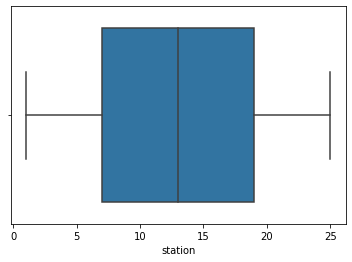

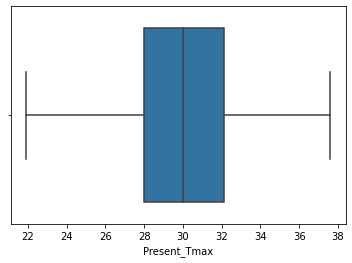

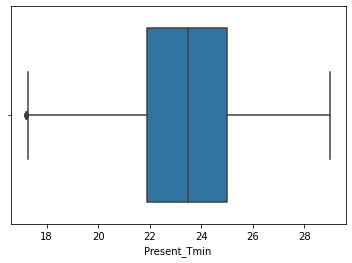

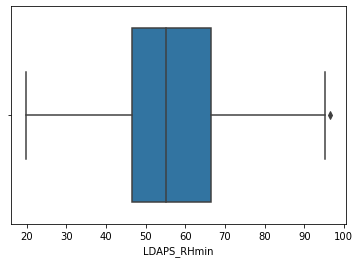

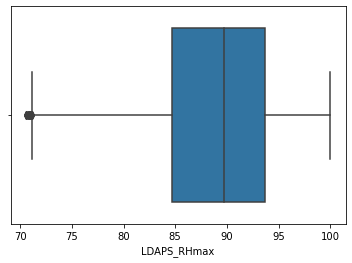

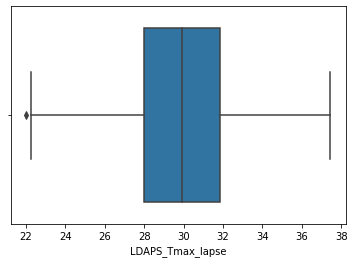

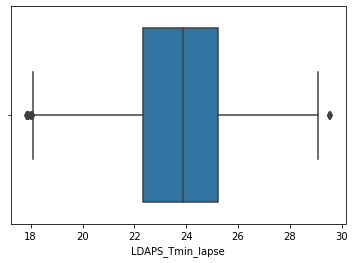

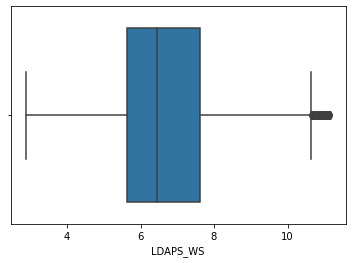

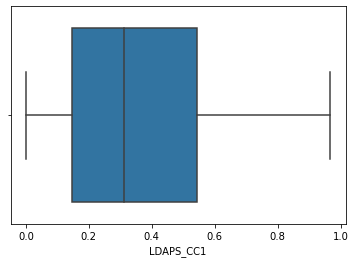

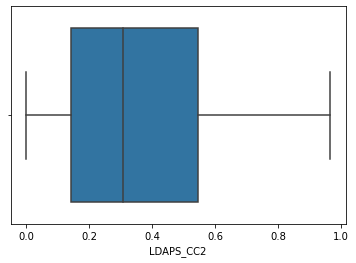

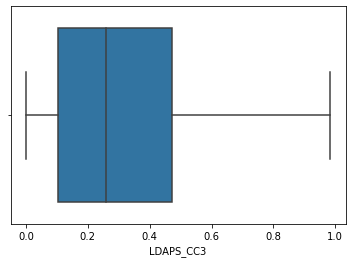

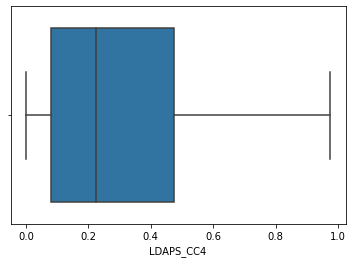

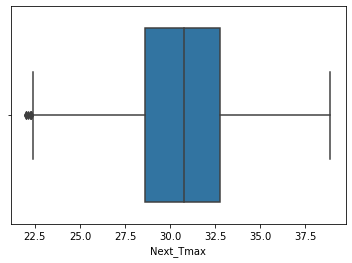

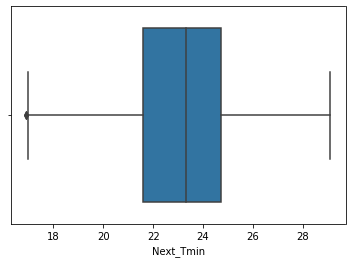

In [32]:
for i in data_clean.columns:
    sn.boxplot(data_clean[i])
    plt.show()

### instead of finding the best models using whole dataset which will be very computational heavy and would take alot of time to find best hyperparameters, it will be better to take 30% randomly sampled dataset. using this randomly sampled dataset build and find best model and then its best hyperparameters. and then build that model on the whole dataset
### randomly sample dataset to 30%

In [33]:
data_clean.reset_index(inplace=True)
n=6970
s=2091
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=data_clean.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmax,Next_Tmin
0,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,0.233947,0.203896,0.161697,0.130928,29.1,21.2
2,2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,0.209344,0.257469,0.204091,0.142125,31.1,23.9
14,14,15.0,32.5,23.6,51.773392,72.999237,29.640103,25.152909,6.360547,0.301713,0.302602,0.191007,0.145542,30.8,22.8
16,16,17.0,32.1,20.1,54.352501,93.218315,29.321525,23.036163,5.497787,0.151998,0.236199,0.195431,0.149973,31.5,21.1
20,20,21.0,32.0,23.6,49.576046,81.601669,29.976196,24.837107,6.413321,0.200845,0.253855,0.207180,0.148091,30.6,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,7672,23.0,26.0,20.9,56.605389,91.945480,26.220300,20.138668,7.682873,0.476038,0.505922,0.835418,0.616844,28.2,18.1
6959,7674,25.0,26.6,20.7,51.889240,88.492317,26.850981,21.182844,7.735349,0.467923,0.516202,0.819804,0.632884,28.5,18.5
6962,7685,11.0,26.0,18.2,26.466705,84.927055,24.565609,18.342840,7.611494,0.363214,0.082103,0.049262,0.098848,24.1,18.3
6968,7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,0.035874,0.074962,0.000000,0.000000,28.6,18.8


In [34]:
y = sampledf[['Next_Tmin','Next_Tmax']]
x = sampledf.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)

### check for biasing and remove them

In [35]:
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

index              -0.006775
station             0.019854
Present_Tmax       -0.255300
Present_Tmin       -0.155022
LDAPS_RHmin         0.291437
LDAPS_RHmax        -0.616040
LDAPS_Tmax_lapse   -0.071564
LDAPS_Tmin_lapse   -0.286774
LDAPS_WS            0.648929
LDAPS_CC1           0.522322
LDAPS_CC2           0.493989
LDAPS_CC3           0.691172
LDAPS_CC4           0.709355
dtype: float64

3


In [36]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [37]:
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

index              -0.006775
station             0.019854
Present_Tmax       -0.255300
Present_Tmin       -0.155022
LDAPS_RHmin         0.291437
LDAPS_RHmax        -0.616040
LDAPS_Tmax_lapse   -0.071564
LDAPS_Tmin_lapse   -0.286774
LDAPS_WS            0.301207
LDAPS_CC1           0.522322
LDAPS_CC2           0.493989
LDAPS_CC3          -0.592684
LDAPS_CC4          -0.419453
dtype: float64

0


### removed all biasing
### lets do feature scaling

In [38]:
x

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
0,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.896289,0.233947,0.203896,0.544796,0.507783
2,2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.830969,0.209344,0.257469,0.588764,0.521864
14,14,15.0,32.5,23.6,51.773392,72.999237,29.640103,25.152909,1.852813,0.301713,0.302602,0.575904,0.526013
16,16,17.0,32.1,20.1,54.352501,93.218315,29.321525,23.036163,1.764937,0.151998,0.236199,0.580316,0.531297
20,20,21.0,32.0,23.6,49.576046,81.601669,29.976196,24.837107,1.857923,0.200845,0.253855,0.591720,0.529065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,7672,23.0,26.0,20.9,56.605389,91.945480,26.220300,20.138668,1.973216,0.476038,0.505922,0.941820,0.851252
6959,7674,25.0,26.6,20.7,51.889240,88.492317,26.850981,21.182844,1.977698,0.467923,0.516202,0.935916,0.858568
6962,7685,11.0,26.0,18.2,26.466705,84.927055,24.565609,18.342840,1.967086,0.363214,0.082103,0.366581,0.462370
6968,7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.870345,0.035874,0.074962,0.000000,0.000000


In [39]:
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
x

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
0,0,1.0,-0.444816,-0.921405,0.105527,0.368254,-0.658082,-0.371896,0.123880,-0.497938,-0.583952,-0.314560,-0.358958
2,2,3.0,0.571771,-0.052488,-0.567741,-0.754302,0.073415,0.392872,-0.332829,-0.592153,-0.371903,-0.110522,-0.297269
14,14,15.0,0.887264,0.084709,-0.350743,-2.479027,-0.090200,0.681016,-0.180100,-0.238448,-0.193265,-0.170203,-0.279090
16,16,17.0,0.747045,-1.515927,-0.169207,0.698595,-0.205726,-0.357556,-0.794510,-0.811745,-0.456092,-0.149728,-0.255940
20,20,21.0,0.711990,0.084709,-0.505408,-1.127072,0.031678,0.526069,-0.144370,-0.624695,-0.386208,-0.096809,-0.265718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,7672,23.0,-1.391294,-1.150068,-0.010632,0.498557,-1.330329,-1.779198,0.661740,0.429086,0.611488,1.527839,1.145774
6959,7674,25.0,-1.180966,-1.241533,-0.342589,-0.044141,-1.101624,-1.266878,0.693080,0.398010,0.652179,1.500441,1.177823
6962,7685,11.0,-1.391294,-2.384844,-2.132009,-0.604456,-1.930373,-2.660313,0.618881,-0.002946,-1.066015,-1.141571,-0.557908
6968,7748,24.0,-2.337772,-2.613506,-2.302774,-1.803911,-1.043889,-2.468628,-0.057518,-1.256411,-1.094279,-2.842698,-2.583539


### check for multicollinearity

In [40]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,2.510351,index
1,2.470253,station
2,2.320790,Present_Tmax
3,2.641719,Present_Tmin
4,5.522553,LDAPS_RHmin
5,1.968061,LDAPS_RHmax
6,5.949840,LDAPS_Tmax_lapse
7,5.393256,LDAPS_Tmin_lapse
8,1.140759,LDAPS_WS
9,2.973968,LDAPS_CC1


### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.
### levels of multicollinearity does it signify.

### VIF ~ 1: Negligible
### 1<VIF<5 : Moderate
### VIF>5 : Extreme
### no changes required here

### perform pca

In [41]:
for i in range(2,13):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9999978122348652
3 0.9999986975938124
4 0.9999991822362445
5 0.9999994085220167
6 0.9999995883453028
7 0.999999707172224
8 0.9999997934478156
9 0.9999998595666998
10 0.9999999151684958
11 0.999999954475863
12 0.9999999847345351


### i want to choose 10 columns as they are able to retain more than 95% data

In [42]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

### Now we will start with model selection and tuning training process.
### first find the most optimum model
### second we need to find the most optimum random state in train test split
### we shall evaluate model on r2 score
### Now write code to find best model along with the best hyper parameter
### code to find best random state for train test split

In [43]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

### iterate to find best model, best random state and most effective hyper parameters

In [44]:
models=[LinearRegression(),Ridge(),RidgeCV(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [45]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
LinearRegression()
score 0.7307555377511703
r2 0.7555157483339932
diff 0.02476021058282285
mae 0.9976353310278399
rmse 1.309783790038713
**********
Ridge()
score 0.7307622721667304
r2 0.7554987919490468
diff 0.02473651978231639
mae 0.9976944198993791
rmse 1.3098268198480114
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.7308064806012696
r2 0.7553390244039833
diff 0.024532543802713636
mae 0.9982407574498474
rmse 1.310231153245776
**********
KNeighborsRegressor()
score 0.7394582340502592
r2 0.7598542698647854
diff 0.020396035814526203
mae 0.9299522673031019
rmse 1.234859426937311
**********
RandomForestRegressor()
score 0.8107889714052261
r2 0.8482338380670272
diff 0.037444866661801135
mae 0.7764057279236283
rmse 1.0111780105272008
**********
BaggingRegressor()
score 0.7812706688969897
r2 0.8221086939122735
diff 0.040838025015283774
mae 0.8502505966587113
rmse 1.1020218455055055
**********
DecisionTreeRegressor()
score 0.6099908217109955
r2 0.6396770252686859
dif

### RandomForestRegressor is the top model with minimum error rate and with minimum issues of overfit and underfit

### Finetune the model

In [46]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2",verbose=1,n_jobs=-1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.0min finished


{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 500}

In [47]:
parameters={"max_samples": [0.5, 1.0],
            "max_features": [0.5, 1.0],
            "bootstrap": [True, False],
            "bootstrap_features": [True, False],
            'base_estimator':[None,DecisionTreeRegressor(),KNeighborsRegressor()]}
clf = GridSearchCV(BaggingRegressor(), parameters, cv=5,scoring="r2",verbose=1,n_jobs=-1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.9s finished


{'base_estimator': None,
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.5}

In [48]:
besttrain(BaggingRegressor(base_estimator=None, bootstrap=False, bootstrap_features= False,max_features=1.0,max_samples=0.5),principalComponents,y)

157

### best random state is 157
### now use whole dataset, re run the whole dataset preprocess steps and use whole dataset to build model

In [52]:
y = data_clean[['Next_Tmin','Next_Tmax']]
x = data_clean.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=157, test_size=0.2)
model=RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = model.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8862815363952015
r2 score train 0.9844846406229741


In [54]:
y_pred=model.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(RandomForestRegressor(criterion='mae',max_features='auto',n_estimators=500),principalComponents,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8862815363952015
mean absolute error: 0.6733980272596857
mean squared error: 0.804832269207318
root mean square error: 0.8971244446604484


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 20.9min remaining: 31.4min


cross val score 0.6186802015938591
std err 0.07234233237068859


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.8min finished


In [55]:
y_pred=model.predict(principalComponents)
score=r2_score(y,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y,y_pred))
print('mean squared error:',mean_squared_error(y,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y,y_pred)))

coeff of determination is: 0.9642999384471882
mean absolute error: 0.3310612410329997
mean squared error: 0.24561843218005797
root mean square error: 0.4955990639418702


# fill the missing values of target variables

In [57]:
dfpred=df[df.Next_Tmin.isnull()][df.Next_Tmax.isnull()]
dfpred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
831,7.0,8,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
856,7.0,8,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN
1073,24.0,8,34.2,25.1,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN
2465,16.0,8,28.8,23.1,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,...,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN
3696,22.0,7,30.4,23.4,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,...,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN
3714,15.0,7,24.6,22.4,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,...,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN
3739,15.0,7,NaN,NaN,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,...,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN
3886,12.0,7,NaN,NaN,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,...,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN
4205,6.0,8,30.8,23.9,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN
4230,6.0,8,NaN,NaN,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,...,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN


In [59]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 831 to 7682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           27 non-null     float64
 1   Date              27 non-null     int64  
 2   Present_Tmax      17 non-null     float64
 3   Present_Tmin      17 non-null     float64
 4   LDAPS_RHmin       27 non-null     float64
 5   LDAPS_RHmax       27 non-null     float64
 6   LDAPS_Tmax_lapse  27 non-null     float64
 7   LDAPS_Tmin_lapse  27 non-null     float64
 8   LDAPS_WS          27 non-null     float64
 9   LDAPS_LH          27 non-null     float64
 10  LDAPS_CC1         27 non-null     float64
 11  LDAPS_CC2         27 non-null     float64
 12  LDAPS_CC3         27 non-null     float64
 13  LDAPS_CC4         27 non-null     float64
 14  LDAPS_PPT1        27 non-null     float64
 15  LDAPS_PPT2        27 non-null     float64
 16  LDAPS_PPT3        27 non-null     float64


### fill null values

In [60]:
dfpred[['Present_Tmax']]=dfpred[['Present_Tmax']].fillna(29.77)
dfpred[['Present_Tmin']]=dfpred[['Present_Tmin']].fillna(23.23)

In [61]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 831 to 7682
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           27 non-null     float64
 1   Date              27 non-null     int64  
 2   Present_Tmax      27 non-null     float64
 3   Present_Tmin      27 non-null     float64
 4   LDAPS_RHmin       27 non-null     float64
 5   LDAPS_RHmax       27 non-null     float64
 6   LDAPS_Tmax_lapse  27 non-null     float64
 7   LDAPS_Tmin_lapse  27 non-null     float64
 8   LDAPS_WS          27 non-null     float64
 9   LDAPS_LH          27 non-null     float64
 10  LDAPS_CC1         27 non-null     float64
 11  LDAPS_CC2         27 non-null     float64
 12  LDAPS_CC3         27 non-null     float64
 13  LDAPS_CC4         27 non-null     float64
 14  LDAPS_PPT1        27 non-null     float64
 15  LDAPS_PPT2        27 non-null     float64
 16  LDAPS_PPT3        27 non-null     float64


In [62]:
dfpred=dfpred.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)

In [63]:
x = dfpred.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
y_pred=model.predict(principalComponents)

In [65]:
dfpred=df[df.Next_Tmin.isnull()][df.Next_Tmax.isnull()]
dfpred[['Present_Tmax']]=dfpred[['Present_Tmax']].fillna(29.77)
dfpred[['Present_Tmin']]=dfpred[['Present_Tmin']].fillna(23.23)
dfpred=dfpred.drop(['Next_Tmin','Next_Tmax'],axis=1)
dfpred[['Next_Tmin','Next_Tmax']]=y_pred

In [66]:
dfpred

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Next_Tmax
831,7.0,8,29.60,25.80,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,24.1930,31.9485
856,7.0,8,29.77,23.23,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,24.1120,32.4434
1073,24.0,8,34.20,25.10,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,23.0073,31.0008
2465,16.0,8,28.80,23.10,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,...,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,24.7273,30.8852
3696,22.0,7,30.40,23.40,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,...,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,23.7946,31.5190
3714,15.0,7,24.60,22.40,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,...,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,24.6326,32.5993
3739,15.0,7,29.77,23.23,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,...,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,23.5681,31.6542
3886,12.0,7,29.77,23.23,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,...,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,21.3743,29.2636
4205,6.0,8,30.80,23.90,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,21.9123,29.7634
4230,6.0,8,29.77,23.23,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,...,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,23.3768,30.1659


### replace these rows in original dataset

In [67]:
df=pd.read_csv('temperature.csv')
df=df[df.Date.notnull()]

In [70]:
for i in list(dfpred.index):
    df['Next_Tmin'][i]=dfpred['Next_Tmin'][i]
    df['Next_Tmax'][i]=dfpred['Next_Tmax'][i]

In [72]:
df[df.Next_Tmax.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [73]:
df[df.Next_Tmin.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [81]:
dicty={'Present_Tmax':29.77,'Present_Tmin':23.23,'LDAPS_RHmin':56.74,'LDAPS_RHmax':88.37,'LDAPS_Tmax_lapse':29.62,
       'LDAPS_Tmin_lapse':23.51,'LDAPS_WS':7.1,'LDAPS_LH':62.46,'LDAPS_CC1':0.37,'LDAPS_CC2':0.36,'LDAPS_CC3':0.32,
       'LDAPS_CC4':0.3,'LDAPS_PPT1':0.59,'LDAPS_PPT2':0.48,'LDAPS_PPT3':0.28,'LDAPS_PPT4':0.27}
for key,values in dicty.items():
    df[[key]]=df[[key]].fillna(value)

In [82]:
pro=df.drop(['Date','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon',
                    'DEM','Slope','Solar radiation'],axis=1)
x = pro.drop(columns = ['Next_Tmin','Next_Tmax'],axis=1)
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']] = scaler.fit_transform(x[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']])
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
y_pred=model.predict(principalComponents)

In [83]:
df[['Next_Tminp','Next_Tmaxp']]=y_pred

### see the difference between actual and predicted value

In [85]:
df['Next_Tmind']=df['Next_Tmin']-df['Next_Tminp']
df['Next_Tmaxd']=df['Next_Tmax']-df['Next_Tmaxp']
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Next_Tminp,Next_Tmaxp,Next_Tmind,Next_Tmaxd
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,126.991,212.3350,2.7850,5992.895996,29.1,21.2,22.9441,30.8740,-1.7441,-1.7740
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,127.032,44.7624,0.5141,5869.312500,30.5,22.5,23.3797,31.3808,-0.8797,-0.8808
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,127.058,33.3068,0.2661,5863.555664,31.1,23.9,24.1188,31.9000,-0.2188,-0.8000
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,127.022,45.7160,2.5348,5856.964844,31.7,24.3,23.8253,31.6206,0.4747,0.0794
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,127.135,35.0380,0.5055,5859.552246,31.2,22.5,23.4804,31.2160,-0.9804,-0.0160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,127.040,26.2980,0.5721,4456.024414,27.6,17.7,19.8259,26.4576,-2.1259,1.1424
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,127.086,21.9668,0.1332,4441.803711,28.0,17.1,19.6927,26.3014,-2.5927,1.6986
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,126.891,15.5876,0.1554,4443.313965,28.3,18.1,19.7727,26.3354,-1.6727,1.9646
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,126.909,17.2956,0.2223,4438.373535,28.6,18.8,19.7949,26.3116,-0.9949,2.2884


### difference in actual and predicted value lies between +/-3

### plot graph to check actual vs pred value

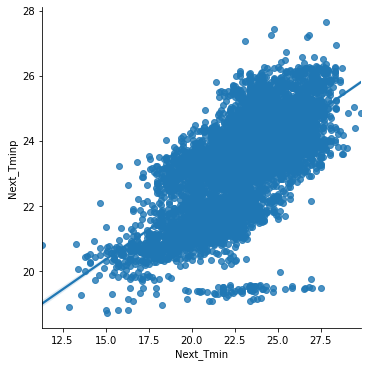

In [86]:
sn.lmplot(x='Next_Tmin',y='Next_Tminp',data=df,palette='rainbow')

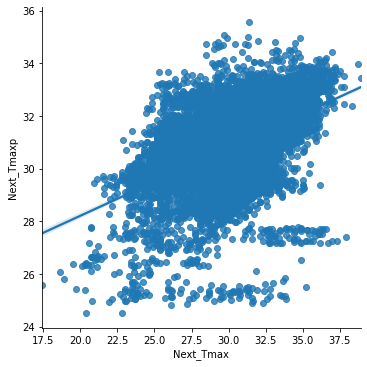

In [87]:
sn.lmplot(x='Next_Tmax',y='Next_Tmaxp',data=df,palette='rainbow')

### ideal sceanrio for above graph is that the closser the points towards the line indicates better model prediction
### from above graphs we can observe the error by model prediction

### Save model

In [93]:
joblib.dump(model,'Temp.pkl')

['Temp.pkl']